**Brian Blaylock**  
*February 19, 2021*

# 🗺 Add common features to your maps with `cartopy_tools`
When I first learned cartopy, it was difficult to know how to add things to a map. Now that I am more experienced, I know what I like to put on my maps to build the baselayer. Instead of recoding all these tasks of adding different features, I simplified and put all these feature layers into a function. Now I can create a cartopy axes and add different features to it (or add features to an existing cartopy axes.

One common line I hate typing so much is `ccrs.PlateCarree()`. Lucky for you, this value is stored in the variable `pc` in cartopy_tools and can be imported.

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from toolbox.cartopy_tools import common_features, pc

## 🐰 Quickly create a Cartopy axes, add features, and change feature style

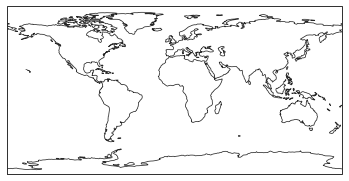

In [2]:
ax = common_features()

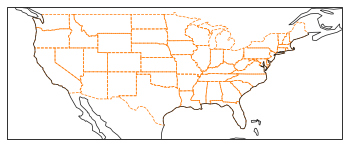

In [3]:
# Add STATES feature, and adjust the display arguments
ax = common_features(STATES=True, STATES_kwargs=dict(edgecolor='tab:orange', linestyle='--'))
ax.set_extent([-130, -60, 23, 45])

You can even specify the projection, and then plot things on the returned axes.

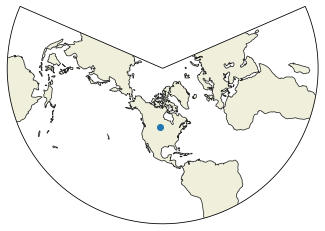

In [4]:
ax = common_features(crs=ccrs.LambertConformal(), LAND=True)

# Add a single point
ax.scatter(-100, 50, transform=pc)

ax.set_global()

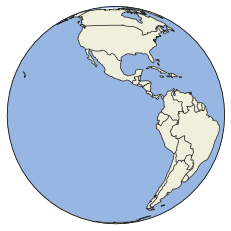

In [5]:
ax = common_features(BORDERS=True, OCEAN=True, LAND=True, crs=ccrs.Geostationary(central_longitude=-100))

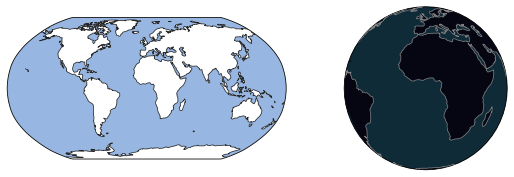

In [6]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Robinson())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Geostationary())

common_features(ax=ax1, OCEAN=True)
common_features(ax=ax2, OCEAN=True, dark=True)

plt.subplots_adjust(wspace=0)

## 📚 Summary of `common_features`
By default, `COASTLINES=True` to always plot coastlines, but you can set that to False if it's not needed.

<div class="alert alert-info">
Note: You may change the Stamen zoom level in the <i>STAMEN_kwargs</i>.
</div>


In [7]:
a = [
    {'COASTLINES':True},
    {'BORDERS':True},
    {'STATES':True},
    {'COUNTIES':True},
    {'OCEAN':True},
    {'LAND':True},
    {'RIVERS':True},
    {'LAKES':True},
    {'ROADS':True},
    {'STAMEN':True},   
]

/p/home/blaylock/anaconda3/envs/basic/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.


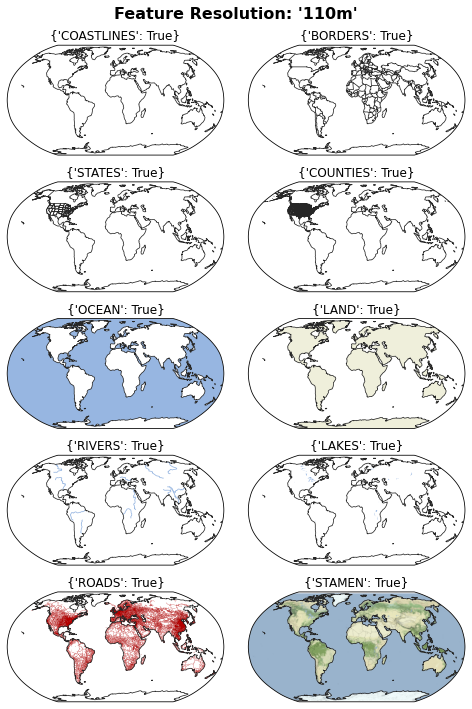

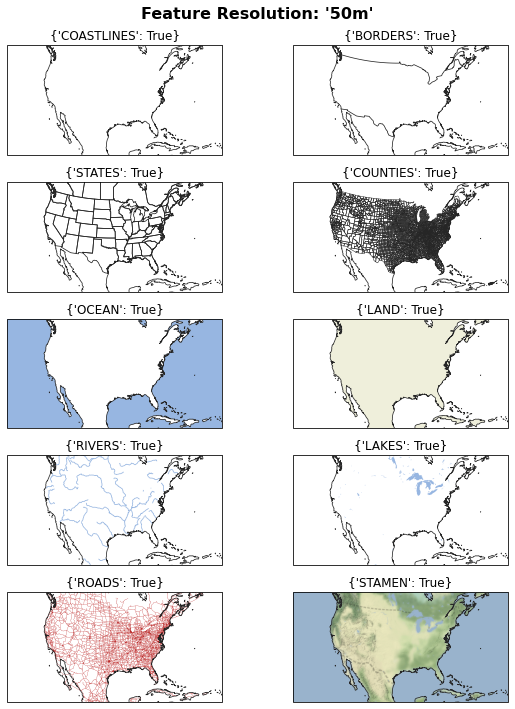

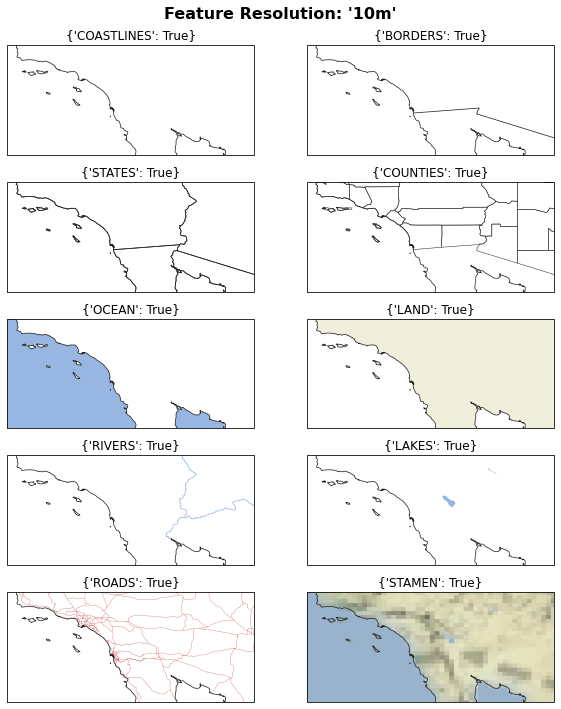

In [14]:
for res, crs in zip(['110m', '50m', '10m'], [ccrs.Robinson(), ccrs.LambertConformal(), pc]):
    plt.figure(figsize=(10,10))
    for i, feature in enumerate(a, 1):
        ax = plt.subplot(len(a)/2, 2, i, projection=crs)
        
        common_features(res, **feature, ax=ax)
        
        if res == '50m':
            ax.set_extent([-130, -60, 20, 50], ccrs.PlateCarree())
        elif res == '10m':
            ax.set_extent([-121, -112, 31, 35], ccrs.PlateCarree())
            
        ax.set_title(feature)

    plt.suptitle(f"Feature Resolution: '{res}'",
                 fontsize=16, ha='center',
                 fontweight='semibold')
    plt.subplots_adjust(wspace=-.26)
    plt.tight_layout()
    plt.savefig(f'../images/features_summary_{res}', bbox_inches='tight')

## 🌓 Light and Dark themed maps

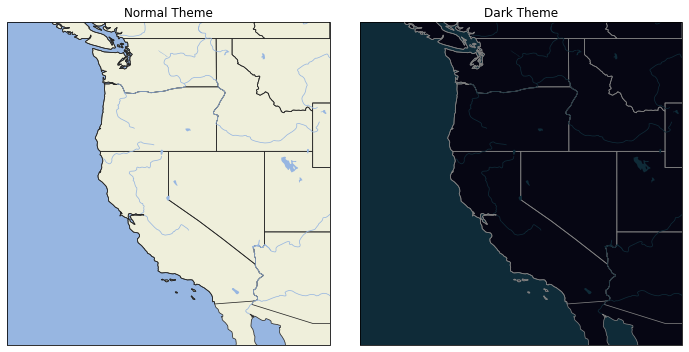

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': pc}, figsize=[10,5])


common_features('50m', ax=ax1,
                COASTLINES=True, OCEAN=True, LAND=True, STATES=True, RIVERS=True, LAKES=True,)
ax1.set_extent([-130, -110, 30, 50])
ax1.set_title('Normal Theme')


common_features('50m', ax=ax2, dark=True,
                COASTLINES=True, OCEAN=True, LAND=True, STATES=True, RIVERS=True, LAKES=True)
ax2.set_extent([-130, -110, 30, 50])
ax2.set_title('Dark Theme')

plt.subplots_adjust(wspace=.02)

plt.tight_layout()
plt.savefig(f'../images/light-dark', bbox_inches='tight')

## 🛣 Roads
All major roads, from the Natural Earth feature

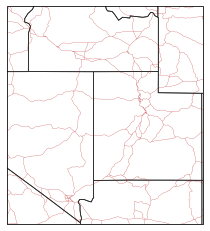

In [11]:
ax = common_features(STATES=True, ROADS=True)
ax.set_extent([-118, -109, 35, 45])

You may separate by road type

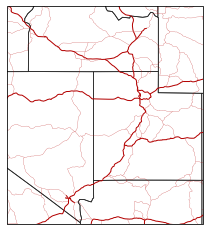

In [12]:
ax = common_features(STATES=True, 
                     ROADS=True, ROADS_kwargs=dict(type=['Major Highway'], linewidth=1))

common_features(ax=ax, 
                ROADS=True, ROADS_kwargs=dict(type=['Secondary Highway']))

ax.set_extent([-118, -109, 35, 45])